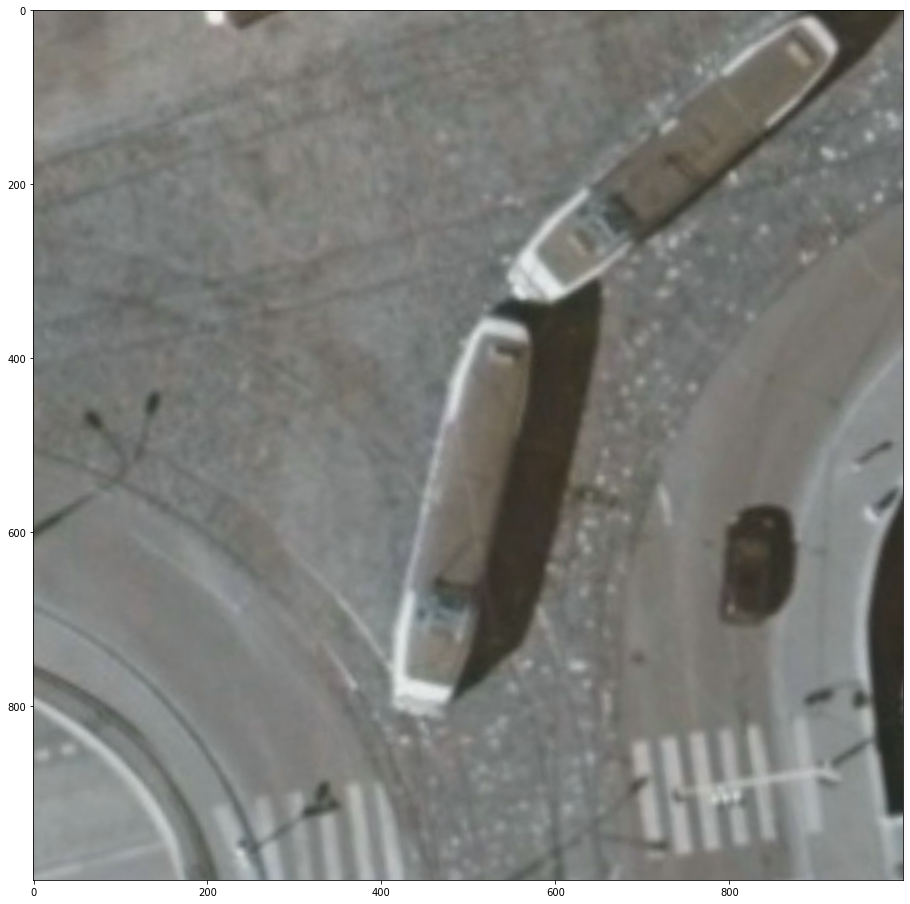

In [9]:
# Library includes
import os
import numpy as np
import cv2
import yaml
import glob
import math
from matplotlib.pyplot import imshow, figure
from pylsd import lsd


# Function definitions
def showimage(img, image_size=16, cmap=None):
    figure(figsize=[image_size, image_size])
    imshow(np.asarray(img), cmap=cmap)


def canny_edge_detect(image, threshold_one, threshold_two):
    gray = cv2.Canny(image, threshold_one, threshold_two) # CV2 threshold function
    return cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)  # Convert the image into BGR2GRAY and record it into gray as


def draw_lines_to_image(img, segments, min_width=None, min_length=None):
    for i in range(segments.shape[0]):
        pt1 = (int(segments[i, 0]), int(segments[i, 1]))
        pt2 = (int(segments[i, 2]), int(segments[i, 3]))
        length = math.sqrt((pt1[0]-pt2[0])*(pt1[0]-pt2[0]) + (pt1[1]-pt2[1])*(pt1[1]-pt2[1]))
        width = segments[i, 4]
        if (min_length is None) or (length 
>= min_length):        
            if (min_width is None) or (width.item() >= min_width):
                cv2.line(img, pt1, pt2, (255, 0, 0), int(np.ceil(width / 2)))
                cv2.line(img, pt1, pt2, (0, 0, 255), 2)
                
                
# Main code
img = cv2.imread("/home/yordan/Downloads/route (1)/topgis/utm_00101.jpg")     # Read the image from path + image name as an array into img

#image_edged = canny_edge_detect(img, 100, 200)
showimage(img)



array([[544.350108, 330.884277, 581.225639, 334.957012,  14.574054],
       [594.834625, 337.266581, 645.747561, 307.737191,  15.951156],
       [926.484471,  39.240872, 892.676007,   1.288618,  16.427279],
       ...,
       [847.992348, 783.151829, 852.206429, 811.119572,   4.253341],
       [874.91372 , 829.012001, 880.212811, 867.109492,   3.083062],
       [ 23.154434, 167.475634,  54.452402, 157.313477,   3.903125]])

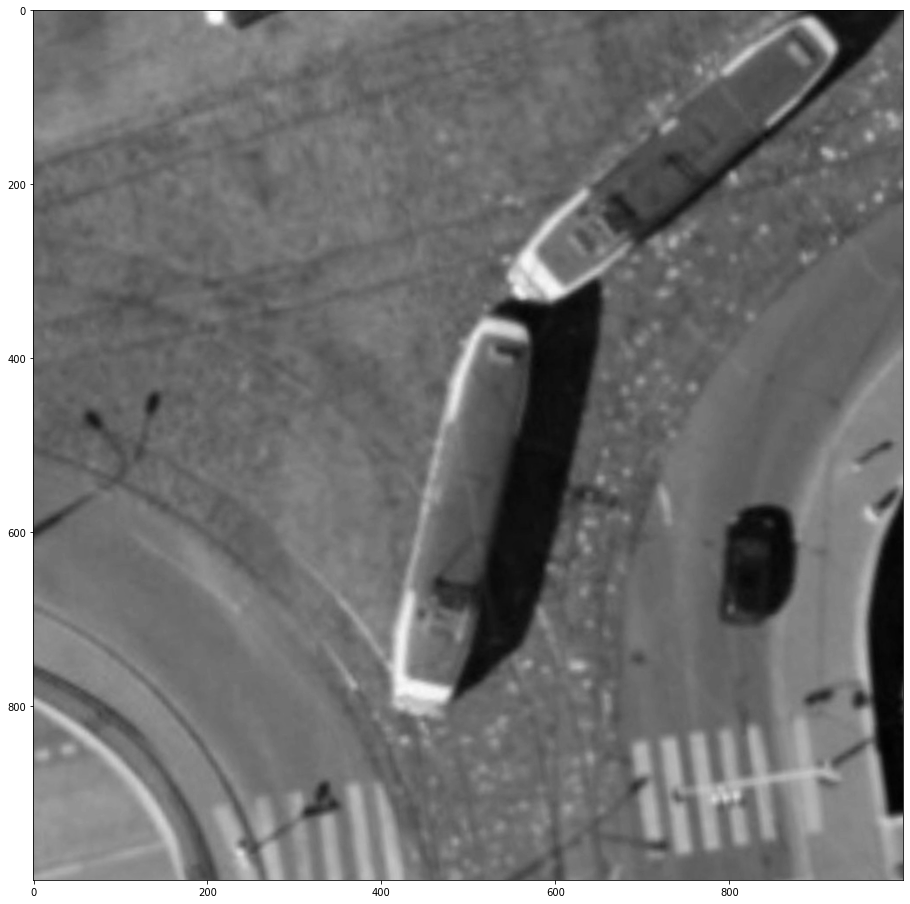

In [13]:
def make_empty_rgb_image(width, height, color=(0, 0, 0)):
    print("make_empty_rgb_image = ", width, height, color)
    blank_image = np.zeros((height, width, 3), np.uint8)
    return blank_image


def resize_image(image, width, height):
    # Resize function cv2.resize
    dsize = (width, height) # Dimenstion of the image after the resizing
    interpolation = cv2.INTER_LINEAR # The method of resizing
    new_image = cv2.resize(image, dsize, interpolation)
    #print("resize_image() = ", new_image.shape, width, height)
    return new_image


def paste_image(s_img, l_img, x_offset, y_offset):
    l_img[y_offset:y_offset + s_img.shape[0], x_offset:x_offset + s_img.shape[1]] = s_img
    #print("Breakpoint")


img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

segments = lsd(img_gray, scale=0.5)
showimage(img_gray, cmap="gray")

segments

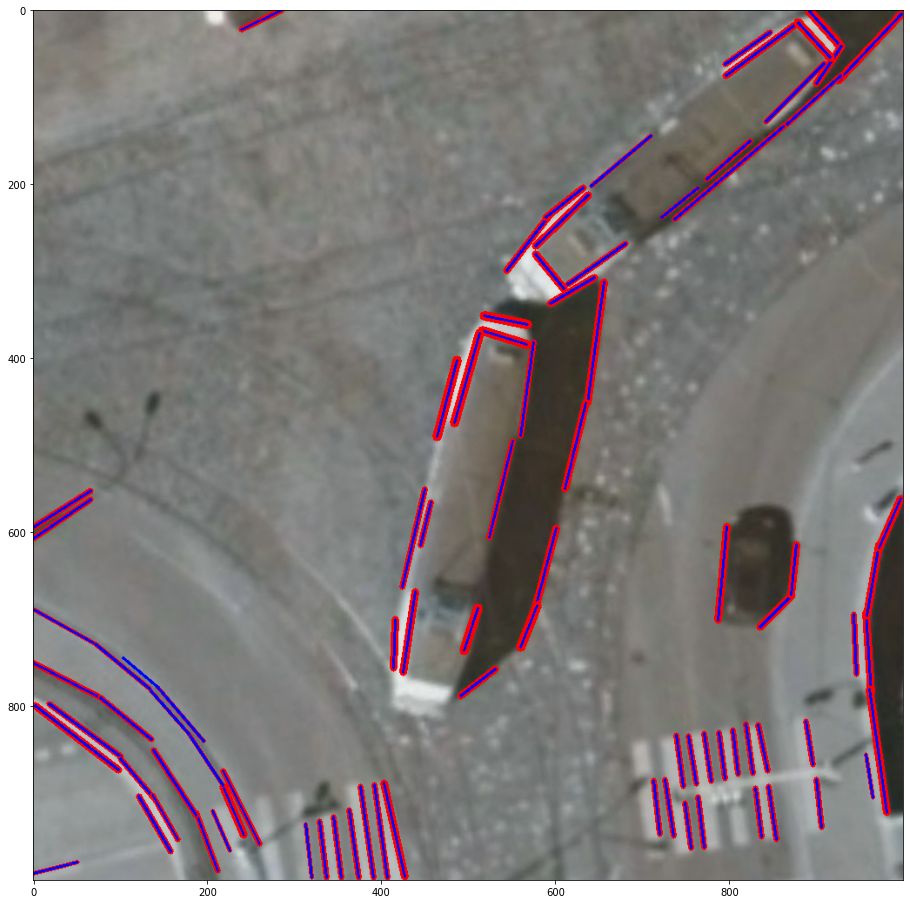

In [11]:
img2 = img.copy()
draw_lines_to_image(img2, segments, min_length=50)
showimage(img2)